# Styling your plots
## Introduction

我们需要明白一点，在向读者展现图形的时候，图形的格式很重要。修改图形的格式，使新的style更加漂亮，
将很大程度上提高图形的交互性，使工作更加有效。    
这一节中，我们要学习的怎么在已经作出的图中，修改格式。一般而言，你可以在你的plot中做任何事情，修改
任何的格式，我们并不会介绍所有的style，只是介绍最基础的图形格式：改变图形大小，颜色，字体，添加标题，
去掉坐标线。
每一个工具都有自己特有的API函数，来修改不同的style，例如matplotlib和seaborn等都要去查对应的API。



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [4]:
df_reviews = pd.read_csv('../dataSet/winemag-data_first150k.csv',index_col=0)

df_reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


## Points on style(在特征points上的格式)
继续使用我们前面介绍过的bar plot。



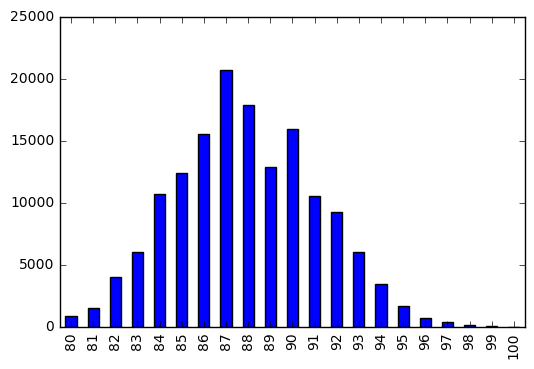

In [5]:
df_reviews['points'].value_counts().sort_index().plot.bar()

虽然这个图片，看起来还不错。但是如果你想修改它的大小，更清晰的看清细节，我们可以使用参数figsize来实现。

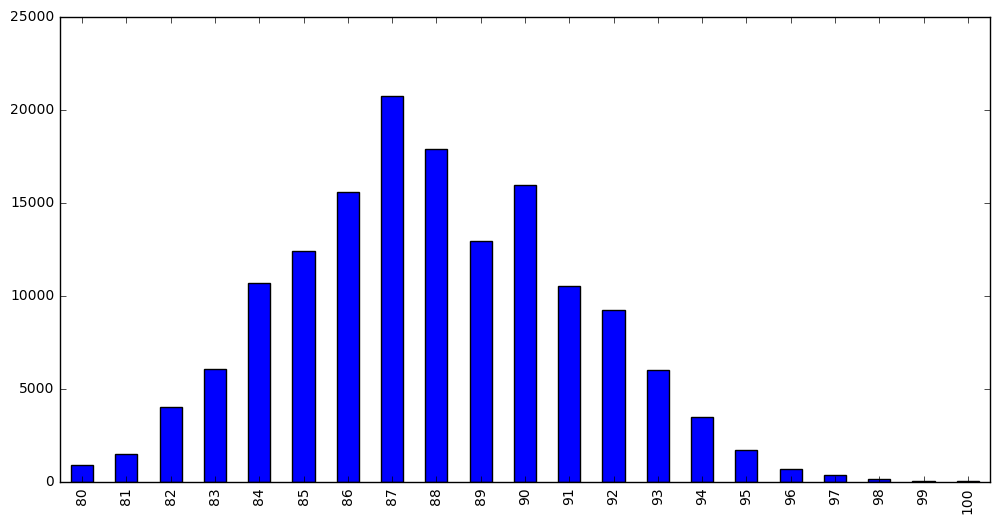

In [6]:
df_reviews['points'].value_counts().sort_index().plot.bar(figsize=(12,6))

figsize控制图片的大小，它的单位是英寸。使用的参数对应的是(宽，高).接下来，我们将改变颜色，color参数。

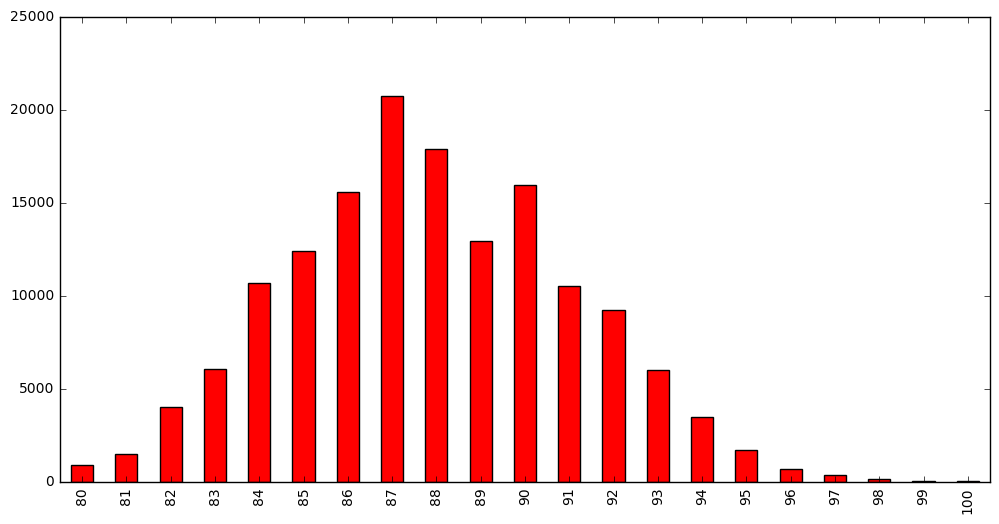

In [7]:
df_reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='red'
)

当图片非常小的时候，坐标轴上的文本，我们很难看清楚，这里的图像很大，并不会有什么影响。其实，可以通过fontsize参数来修改文本的大小。

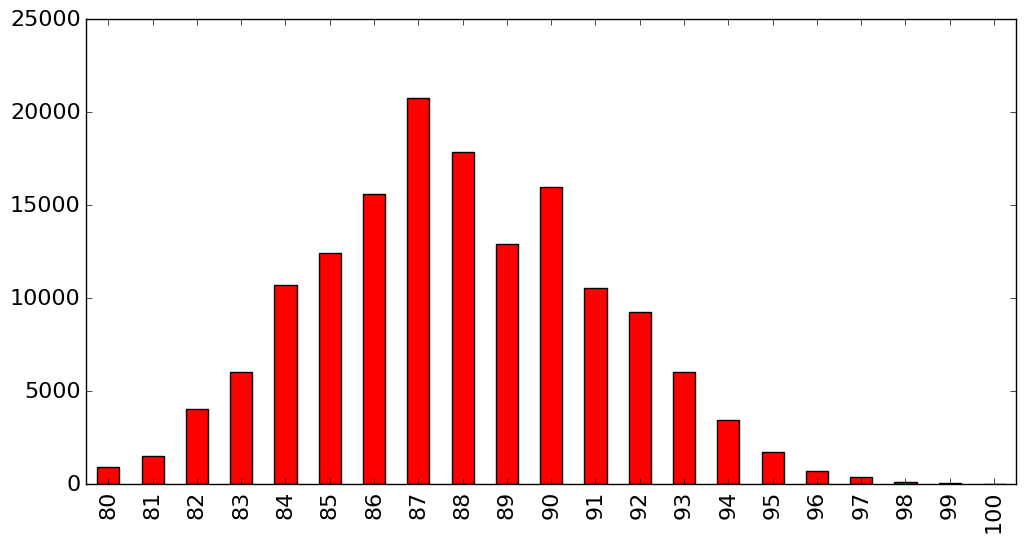

In [9]:
df_reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='red',
    fontsize=16
)

我们还需要一个标题。需要提醒大家的是：matplotlib并不是很好的支持中文的显示。

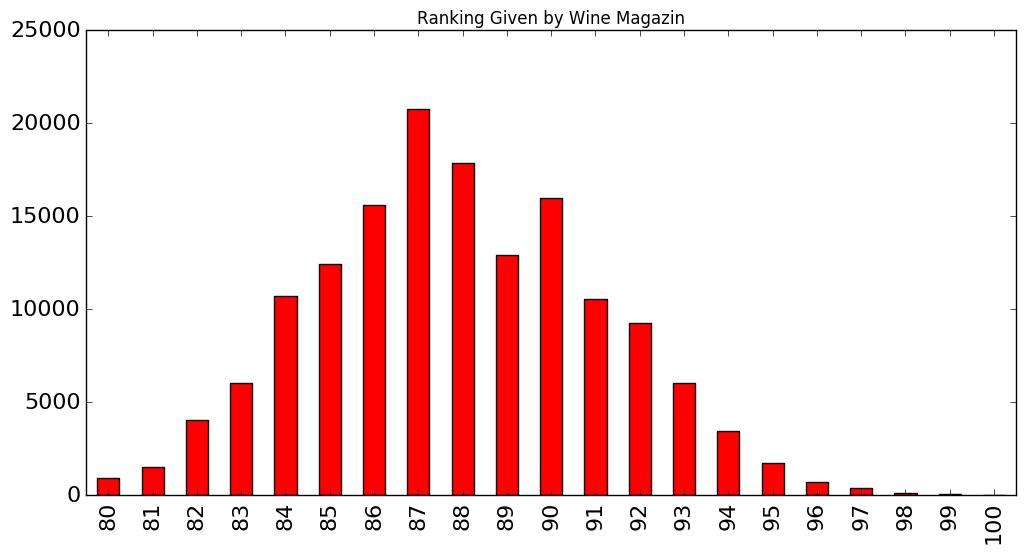

In [12]:
df_reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='red',
    fontsize=16,
    title='Ranking Given by Wine Magazin',
)

很不幸，我们的标题有点小，然而pandas的数据可视化，并没有给我们提过修改标题大小的参数。但是我们知道pandas的数据可视化接口都来自matlotlib库，而且matplotlib提供的修改title的大小的方法。因此我们可以先得到matpoltlib对象，再进行添加其他的参数。

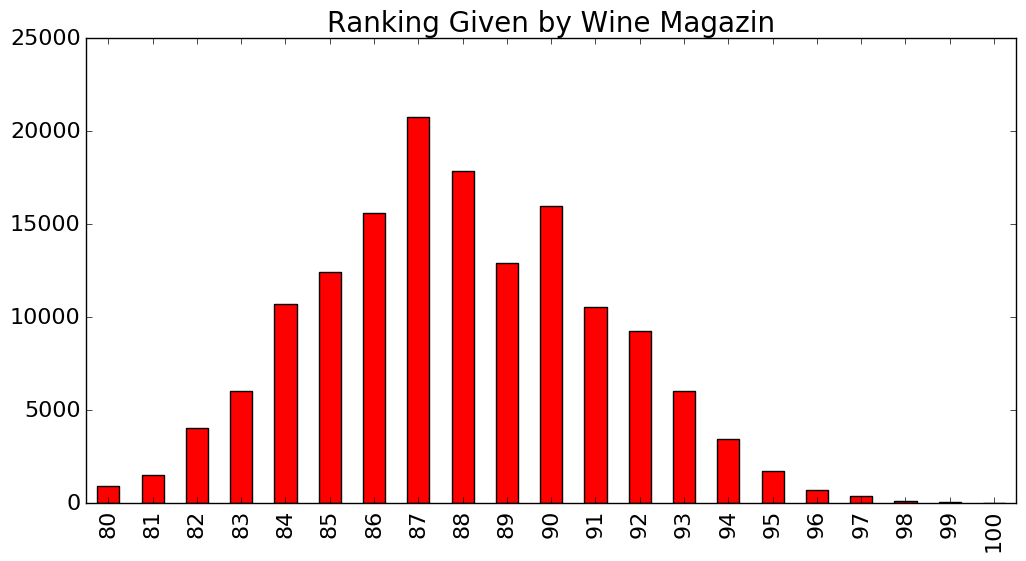

In [13]:
ax = df_reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='red',
    fontsize=16
)

ax.set_title('Ranking Given by Wine Magazin',fontsize=20)

在上个cell中，我们首先得到matplotlib的对应，在进行设置其他的参数。下面要介绍另一个包seaborn，它比matplotlib更简单。
它也是基于matplotlib进行封装的。我们可以使用seaborn.despine方法，去掉坐标轴的线。


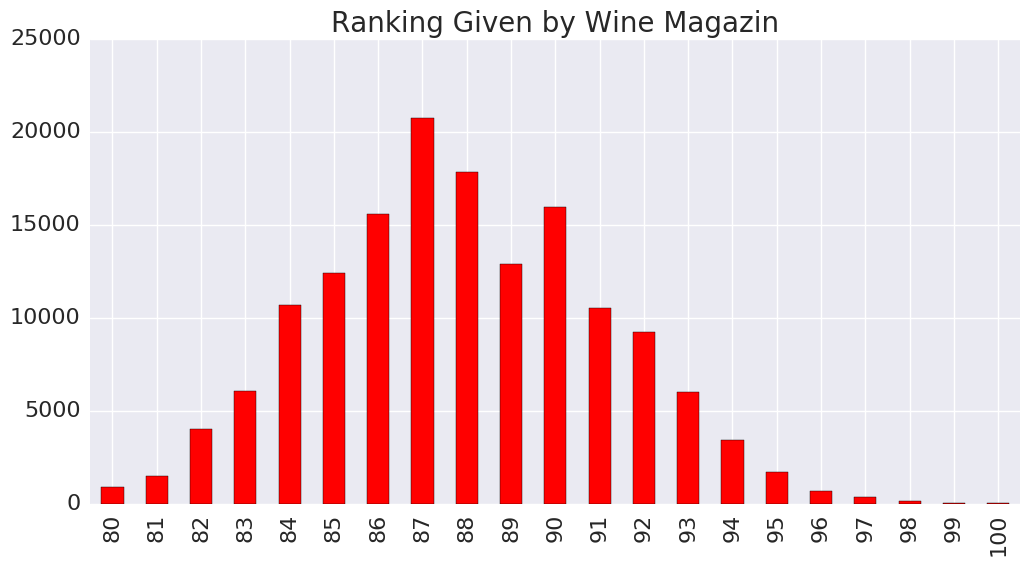

In [15]:
import seaborn as sns

ax = df_reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='red',
    fontsize=16,
)
ax.set_title('Ranking Given by Wine Magazin', fontsize=20)

sns.despine(bottom=True, left=True)

Prefect,上面这个图已经很清晰的解释了图表的意义。对图片的style，我们能够做的事情有很多，不仅仅是上面介绍的一些。不同的plot有不同style格式，color是最普遍的，在scatter中s对应的是size。

# 练习
提高设计的技巧。


In [16]:
df_pokemon = pd.read_csv('../dataSet/pokemon_simple.csv')
df_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


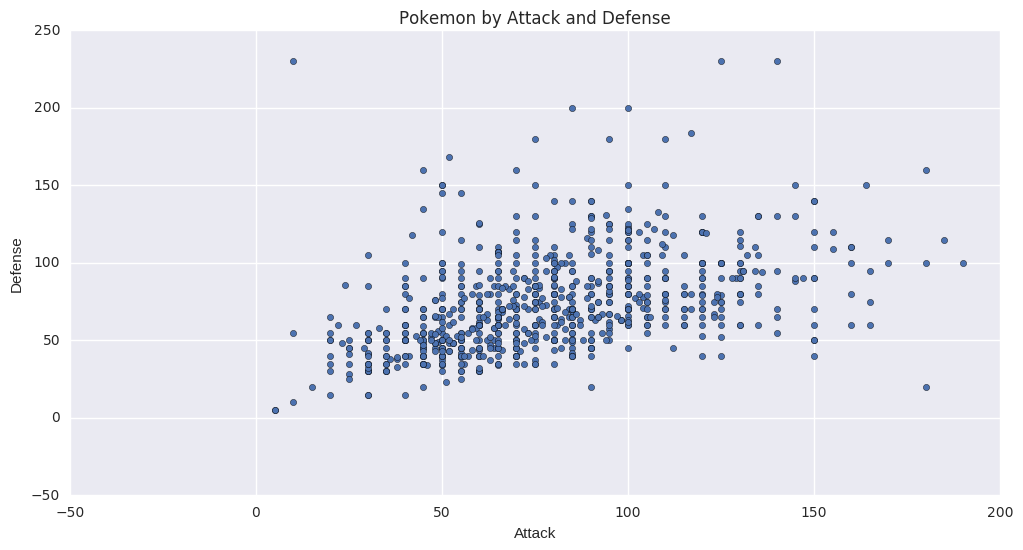

In [17]:
# 画出 Attacl 和 Defense对应的散点图，并修改大小，添加title
df_pokemon.plot.scatter(x='Attack', y='Defense', figsize=(12,6), title='Pokemon by Attack and Defense')


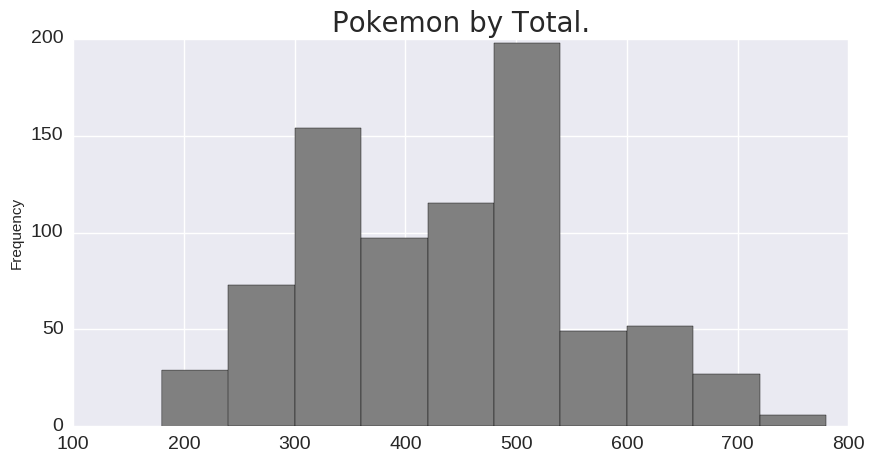

In [20]:
# 显示Total变量对应的直方图分布
ax = df_pokemon['Total'].plot.hist(
    figsize=(10,5),
    fontsize=14,
    color='gray',
)
ax.set_title('Pokemon by Total.', fontsize=20)

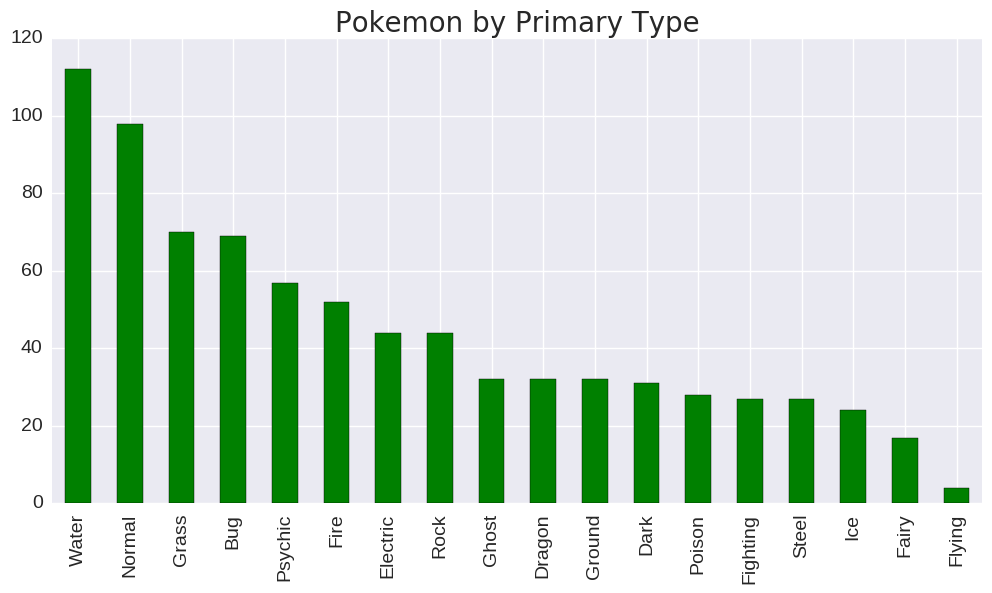

In [21]:
# pokemon Type对应的主要类型
ax = df_pokemon['Type 1'].value_counts().plot.bar(
    figsize=(12,6),
    color='green',
    fontsize=14,
)
ax.set_title('Pokemon by Primary Type', fontsize=20)
sns.despine(bottom=True,left=True)

# 总结
在这个section中，我们学习了一些小的作图的技巧，使我们的图形更加的吸引人，高效，便于交互。这里主要学习了matplotlib库函数。下一节我们要学习的Subplots。

原文地址: https://www.kaggle.com/residentmario/bivariate-plotting-with-pandas
